In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Group_5_data_cleaned.csv")
df.head()

,Unnamed: 0,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),is_Winter,is_Spring,is_Summer,is_Autumn,is_Holiday,is_Functioning_day,Month,Day,int_date
0,0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
1,1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
2,2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
3,3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
4,4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0


In [3]:
df = df.drop(['Unnamed: 0'],axis=1)

# Data training and testing

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
X = df.drop('Rented Bike Count',axis=1)
y = df['Rented Bike Count']

In [6]:
#Min Max scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score

scaler = MinMaxScaler()
model=scaler.fit(X)
scaled_X=model.transform(X)

y = y.values.reshape(-1, 1)
model1=scaler.fit(y)
scaled_y=model1.transform(y)

In [7]:
#splitting data into train,validation and test datasets
X_train, X_rem, y_train, y_rem = train_test_split(scaled_X,scaled_y, train_size=0.80,random_state=42)

In [8]:
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)

In [9]:
# shapes of train,validation and  test split
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(7008, 17)
(7008, 1)
(876, 17)
(876, 1)
(876, 17)
(876, 1)


(None, None)

fit regression model 

In [10]:
# Train the linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Predict the solution for the year 2000-2006
y_test_pred = reg.predict(X_test)


In [11]:
# validating the model on validation set

y_valid_pred = reg.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid, y_valid_pred)
MAE =  metrics.mean_absolute_error(y_valid, y_valid_pred)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.016729155088559357
The mean absolute error is 0.09702490794482914
The root mean sqaured error is 0.12934123506662273


# SGD Regressor 

In [12]:
 from sklearn.linear_model import SGDRegressor

In [13]:
sgd_reg = SGDRegressor()

sgd_reg.fit(X_train, y_train)

SGDRegressor()

In [14]:
# validating  the model on validation set

y_valid_pre = sgd_reg.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid, y_valid_pre)
MAE =  metrics.mean_absolute_error(y_valid, y_valid_pre)
RMSE = MSE**0.5
print(f"The measn squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The measn squared error is 0.018406619615023347
The mean absolute error is 0.10043486979032994
The root mean sqaured error is 0.1356709976930344


# Linear Regression works better for the model

In [15]:
# Testing the linear regression model on the test set
y_test_pred = reg.predict(X_test)
MSE = metrics.mean_squared_error(y_test, y_test_pred)
MAE =  metrics.mean_absolute_error(y_test, y_test_pred)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean squared error is {RMSE}")

The mean squared error is 0.013696382522852034
The mean absolute error is 0.08901926632358415
The root mean squared error is 0.11703154499045133


R^2 is 0.5451492679602775
RMSE is: 0.11703154499045133


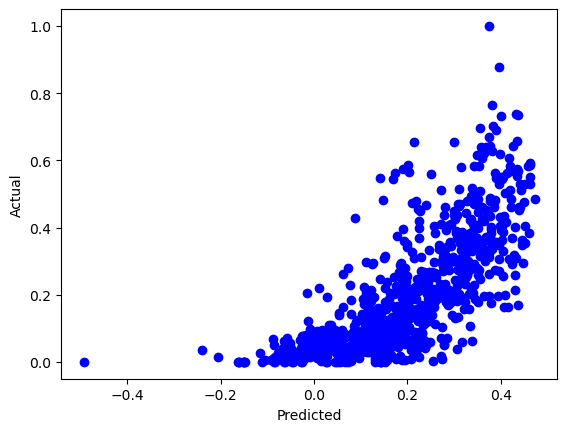

In [17]:
plt.scatter(y_test_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {reg.score(X_test,y_test)}\nRMSE is: {metrics.mean_squared_error(y_test,y_test_pred,squared=False)}')

# Finding best parameters using gridsearch

In [18]:
from sklearn.model_selection import  GridSearchCV 

In [19]:
parameters = {'fit_intercept':[True,False],'copy_X':[True,False]}
normal_model = LinearRegression()
model = GridSearchCV(normal_model,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3)
model.fit(X_train,y_train)
print(model.best_params_)
#fitting Linear Regression with above parameters

{'copy_X': True, 'fit_intercept': True}


In [20]:
best = LinearRegression(copy_X= True, fit_intercept= True)
best.fit(X_train,y_train)
filename = 'Linearregression.pkl'
pickle.dump(best, open(filename, 'wb'))

In [21]:
#model evalution on test data set
y_test_pred = best.predict(X_test)
MSE = metrics.mean_squared_error(y_test, y_test_pred)
MAE =  metrics.mean_absolute_error(y_test, y_test_pred)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.013696382522852034
The mean absolute error is 0.08901926632358415
The root mean sqaured error is 0.11703154499045133


In [22]:
#Regression score is 
print(f" r2 score is {r2_score(y_test,y_test_pred)}")

 r2 score is 0.5451492679602775
